<img align="right" src="https://raw.githubusercontent.com/GT4SD/gt4sd-core/main/docs/_static/gt4sd_logo.png" alt="logo" width="100" height="100"/>

##  Demo: Regression Transformer in the Generative Toolkit for Scientific Discovery


In [3]:
import logging, sys
logging.disable(sys.maxsize)


from gt4sd.algorithms.conditional_generation.regression_transformer import (
    RegressionTransformer, RegressionTransformerMolecules
)
from rdkit import Chem
from selfies import encoder

# Let us have a look at Buturon, a common herbicide

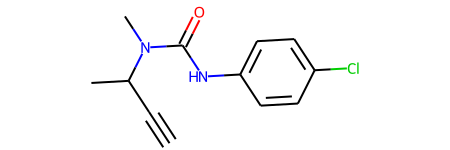

In [4]:
smi = 'CC(C#C)N(C)C(=O)NC1=CC=C(Cl)C=C1'
Chem.MolFromSmiles(smi)

## Buturon has a water solubility score of -3.90
## We can predict its ESOL (estimated solubility) value with the RegressionTransformer

In [5]:
config = RegressionTransformerMolecules(search='greedy')
target = f"<esol>[MASK][MASK][MASK][MASK][MASK]|{encoder(smi)}"
esol_predictor = RegressionTransformer(configuration=config, target=target)
score = list(esol_predictor.sample(1))[0]
print(f'\nFor Buturuon, the predicted ESOL is {score}')


For Buturuon, the predicted ESOL is -5.2467


#### Ok, we can see that the prediction was decently close but not perfect
#### Now let us try to improve Buturuon to a molecule with higher solubility
#### Note, that we will use the same model to do so!


#### We simply set the hyperparameters for the search and mask undesired parts of the molecule

In [6]:
config = RegressionTransformerMolecules(search='sample', temperature=2, tolerance=5)
target = "<esol>-3.534|[C][C][Branch1_3][Ring1][C][#C][N][Branch1_3][epsilon][C][C][Branch1_3][epsilon][MASK][MASK][MASK][MASK][C][=C][Branch1_3][epsilon][Cl][C][=C][Ring1][Branch1_2]"

In [7]:
esol_generator = RegressionTransformer(
    configuration=config, target=target
)
generations = list(esol_generator.sample(5))
generations

[('CC(C#C)N(C)C(Cl)C1(C=C(Cl)C=C1)', -4.0012),
 ('CC(C#C)N(C)C1C(C)(Cl)C=C1', -4.0012),
 ('CC(C#C)N(C)C=C1C=C(Cl)C=C1', -4.0012),
 ('CC(C#C)N(C)C(C)OOC(Cl)C=C', -4.0012),
 ('CC(C#C)N(C)C(C)OON1C=C(Cl)C=C1', -4.0012)]

****Buturuon-inspired molecules with a higher solubility score*** 


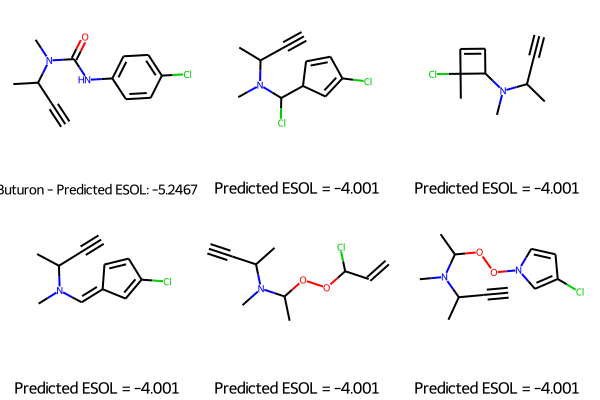

In [8]:
print('\033[1m' '****Buturuon-inspired molecules with a higher solubility score*** ')
Chem.Draw.MolsToGridImage(
    [Chem.MolFromSmiles(smi)] + [Chem.MolFromSmiles(s) for s,p in generations],
    legends=[f'Buturon - Predicted ESOL: {score}'] + [f'Predicted ESOL = {p:.3f}' for s,p in generations]
)
